<figure>
  <IMG SRC="https://github.com/patmanas/figs/raw/main/LogoMORE.jpg" WIDTH=150 ALIGN="right">
</figure>

# Probabilistic Modelling of real-world phenomena through ObseRvations and Elicitation (MORE)

---

## Expert Judgement - Anduryl

### Objetive

Create a code that obtains the main indeces in Expert Judgement using Anduryl

### Index

0. Required Installations 
1. Load libraries
2. Introduction
3. Create Project
4. Scores Calculations
5. Combined Score
6. Decision Maker
7. Robustness

### 1. Load libraries

In [1]:
import anduryl
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
# %matplotlib inline

c:\Users\lucne\anaconda3\envs\expert\Lib\site-packages\pydantic\_internal\_config.py:341: UserWarning: Valid config keys have changed in V2:
* 'allow_population_by_field_name' has been renamed to 'populate_by_name'
  warnings.warn(message, UserWarning)


### 2. Introduction

Anduryl is a Python module and GUI for expert elicitation based on Cooke's classical method. Anduryl allows to set up your structured expert judgment project, calculate decision makers, robustness analysis and visualizations. In this Notebook an example on how tu use and apply Anduryl is given. For more information you can check the paper https://doi.org/10.1016/j.softx.2020.100497 and github repository https://github.com/grongen/anduryl.

Fun fact, the original paper introducing ANDURIL (matlab predecesor of ANDURYL) includes the following explanation for the name: 
"In order to avoid confusion of the minority of people, who are not familiar with the universe of Lord of the Rings by J.R.R. Tolkien, the authors would like to clarify the inspiration for the name of the developed Matlab toolbox. Andúril was the name of the sword of Aragorn, the son of Arathorn, which was reforged from the shards of Narsil (the sword that was used by Isildur to cut the One Ring from Sauron’s hand). Excalibur is also the name of the legendary sword of King Arthur. Similarly to the sword, the source code of EXCALIBUR software remained accessible only to a few worthy ones. Therefore, the researchers and practitioners could only admire and use the software without being able to further investigate and explore developments of the method. To change this, the existing software had to be “broken to pieces” and then “reforged”. Naturally, the name of the resulting new open-source Matlab toolbox is ANDURIL. Hopefully, this will help in bringing peace to troubled researchers and practitioners of Cooke’s classical model."


Along this notebook, we will be working with the hypothetical example from the previous notebook. The case presents 3 differents experts that have answered 5 calibration questions (where a realization is known to the analysis but not to the experts at the moment of the elicitation and are used to objectively evaluate expert's assesment) and one question of interest (where no realization is present and is the main purpose of the expert judgement study). The experts answer every question providing respectively the quantiles 5th, 50eth and 95th of their uncertainty distributions. 



### 3. Create Project

In order to be able to use Anduryl, input files require a certain format. This will be discussed later in the "File_info.ipynb" notebook. For some general examples, the cases folder in the Github repository presents different examples. In the particular case of this notebook, the files example.dtt and example.rls contain the relevant infromation for the hypothetical case. The two different files are taken as input, one (the .dtt file) including the experts' responses and the other (.rls file) contains the realizations. For the experts file, information about the number of quantiles, the label of the question, the complete question and the units of the variable can be included. For the realizations file, the quantiles are not required and introducing the value -9.99500E+0002 is taken as a NaN as required for questions of interest.  With the code below we create an ANDRYL project. 

In [2]:
# Create project and load Excalibur files
file = 'maeslantkering'
project = anduryl.Project()
project.io.load_excalibur(f'./{file}.dtt', f'./{file}.rls')
project

Main project class.
Properties:
 - assessments
 - experts
 - io
 - items
 - main_results
 - results
Methods:
 - add_results_from_settings
 - calculate_decision_maker
 - calculate_expert_robustness
 - calculate_item_robustness
 - initialize
 - to_results

We can see that when creating a project different "Properties" and "Methods" can be obtained and used. The properties contain the information about the realization, experts and scores. The methods can be applied to the different properties in order to perform different analyses. For example, obtaining the scores or a decision maker. 

In the code below we explore the "items", "experts" and "assessments" properties. With these properties later we can make analysis using Cooke's method in ANDURYL. 

For the items, the question, the scale and the realization are shown. In our example files, no description of the question or units are included but this is possible if introduced in the documents.

In [3]:
pd.DataFrame.from_dict(project.items.as_dict())

,scale,realization,question,unit
QUESTION1,uni,7.00,,
QUESTION2,uni,7.00,,
QUESTION3,uni,10.00,,
QUESTION4,uni,226.57,,
QUESTION5,uni,249.29,,
QUESTION6,uni,240.00,,
QUESTION7,uni,212.00,,
QUESTION8,uni,230.00,,
QUESTION9,uni,250.00,,
QUESTION10,uni,2.00,,


Then we can show a table with experts relevant metrics and values. As now calculations have been applied we would expect this table filled with NaN for now. The columns have the name of the expert, the information and calibration scores, number of answered questions, the weight and the user weight.

In [4]:
pd.DataFrame.from_dict(project.experts.as_dict())

,Name,Info. score total,Info. score real.,Calibration score,Answered seed items,Weight,User weight
Ex1,Ex1,NaN,NaN,NaN,NaN,NaN,NaN
Ex2,Ex2,NaN,NaN,NaN,NaN,NaN,NaN


Before the calculations, we can have a look at the responses of the experts to each of the questions. Just to check that everything looks as expected.

In [5]:
pd.DataFrame.from_dict(project.assessments.as_dict()).head(70)

0.05   0.50   0.95
Ex1 QUESTION1     9.0   16.0   26.0
    QUESTION2     8.0   13.0   17.0
    QUESTION3    18.0   31.0   51.0
    QUESTION4   213.0  222.0  237.0
    QUESTION5   218.0  224.0  237.0
    QUESTION6   213.0  224.0  238.0
    QUESTION7   202.0  212.0  222.0
    QUESTION8   220.0  230.0  240.0
    QUESTION9   245.0  250.0  255.0
    QUESTION10    1.0    2.0    3.0
    QUESTION11   90.0   96.0  100.0
    QUESTION12  210.0  220.0  230.0
    QUESTION13  260.0  290.0  310.0
    QUESTION14  270.0  300.0  320.0
    QUESTION15    4.0   20.0  130.0
    QUESTION16  260.0  400.0  610.0
    QUESTION17  250.0  380.0  580.0
    QUESTION18  260.0  340.0  570.0
    QUESTION19  230.0  320.0  540.0
Ex2 QUESTION1     7.0   14.0   28.0
    QUESTION2     7.0   15.0   30.0
    QUESTION3     8.0   16.0   32.0
    QUESTION4   200.0  205.0  225.0
    QUESTION5   210.0  215.0  235.0
    QUESTION6   220.0  225.0  225.1
    QUESTION7   230.0  250.0  270.0
    QUESTION8   225.0  255.0  275.0
    QUESTION9   240.0  260.0  280.0
    QUESTION10    0.0    0.1    1.0
    QUESTION11   50.0   60.0   80.0
    QUESTION12  240.0  260.0  290.0
    QUESTION13  200.0  210.0  220.0
    QUESTION14  250.0  290.0  310.0
    QUESTION15   10.0   15.0   20.0
    QUESTION16  320.0  350.0  370.0
    QUESTION17  300.0  320.0  340.0
    QUESTION18  290.0  310.0  320.0
    QUESTION19  180.0  300.0  320.0

### 4. Scores Calculations

In this section we use ANDURYL in order to compute the same or very similar values as the ones calculated in the previous Notebook. Notice that in the exaple below no robusntess analysis is performed.

In [6]:
# Calculate decision maker with performance based weights
project.calculate_expert_robustness(
    weight_type='global',
    overshoot=0.1,  # this is the k factor that adjusts the range of the support from the previous Notebook
    max_exclude = 0 # this means no robustness analysis is performed  
)

After the calculation, we can see that the table has been filled. As we have not defined user weights that column should remain as NaNs. Expert 1 shows a considerably higher Information Score compared to the other two, but very low Calibration Score. On the other hand, Expert 2 has a higher Calibration Score. Expert 3 seem to fall in between the other two. It is clear that the Calibration Score of Expert 1 penalizes him in the weights. Expert 2 and Expert 3 show a much higher weight with Expert 3 presenting the largest weight.

In [7]:
pd.DataFrame.from_dict(project.experts.as_dict())

,Name,Info. score total,Info. score real.,Calibration score,Answered seed items,Weight,User weight
Ex1,Ex1,0.519847,0.648789,9.837546e-03,14.0,6.382495e-03,NaN
Ex2,Ex2,0.913467,0.619275,7.754119e-07,14.0,4.801931e-07,NaN


### 5. Combined Score

Once the different scores are calculated, they can actually be combined into the Combined Score. The score is defined as the product of the Calibration Score and the Information Score:

$$CS(e) = Cal(e) * Inf(e)$$

This combination is relevant for the calculation of the Decision Maker and the weights required for that.

### 6. Decision Maker

When having multiple ($N$) experts, we can create what is known as de Decision Maker ($DM$) by combining the different experts using weights. The PDF and CDF of the $DM$ are as follows:

$$f_{DM} = \sum \limits _{i=1} ^{N} w_{i} f_{i}$$
$$F_{DM} = \sum \limits _{i=1} ^{N} w_{i} F_{i}$$

Where $f_{i}$ corresponds to the PDF, $F_{i}$ to the CDF and $w_{i}$ the weight assigned to the expert $i$. There are different ways to define the weights. One way is to provide equal weights to each of the experts, generating the Equal Weight DM. Another option is to make use of the $CS$ to create a Performance-based Weight $DM$. The weights for this case are defined as:

$$w_{i} = \frac{CS(e_{i})}{\sum \limits _{j=1} ^{N} CS(e_{j})}$$

On top that, if we don't want experts with very low statistical accuracy, we can impose a restriction by only using experts with a Calibration Score higher than a particulat threshold (often $0.05$, why?). 

Notice that the Decision Maker presents can be treated a another expert and its Calibration and Information Scores can be computed and compared to the actual experts.

In the following blocks, you can see an example on how to calculate a Decision Maker using Anduryl and how to make plots of the CDFs for the different questions.

In [8]:
# Calculate decision maker with global weights, using performance based
project.calculate_decision_maker(
    weight_type='global',
    overshoot=0.1,
    exp_id='DMgl',
    calpower=1.0, # Calibration power, relative weight of the calibration compared
                  # to the information score
    exp_name='Decision Maker global weights',
    alpha=0.0,    # Significance level for the calibration score. Experts with a lower
                  # calibration score get zero weight. If None, the weights
                  # are returnes for all possible significance levels 
                  # (unique calibration scores)
    overwrite=True
)

project.experts.user_weights[0:3] = [1.0, 1.0, 1.0] # Equal weight DM

# Calculate decision maker with user defined weights
project.calculate_decision_maker(
    weight_type='user',
    overshoot=0.1,
    exp_id='DMeq',
    calpower=1.0,
    exp_name='Decision Maker equal weights',
    alpha=0.0,
    overwrite=True
)




The DM can be calculated in multiple ways, it can be equal weight DM, setting as 1 the user weights of each of the experts, or performance based DM which is the example shown in the code above using global.

After we calculate the DM, you can see that it appears as another expert with specific scores and weights. We have also included User weights, so that column is filled now. By looking at the weights, it falls in between the very low Expert 1 and the other two experts. In the information Score, it seems to perform worse than all the other experts but in the Calibration Score is between Experts 2 and 3. Remember that the DM is a weighted combination of the Experts.

In [9]:
pd.DataFrame.from_dict(project.experts.as_dict())

,Name,Info. score total,Info. score real.,Calibration score,Answered seed items,Weight,User weight
Ex1,Ex1,0.519847,0.648789,9.837546e-03,14.0,6.382495e-03,1.0
Ex2,Ex2,0.913467,0.619275,7.754119e-07,14.0,4.801931e-07,1.0
DMgl,Decision Maker global weights,0.518671,0.647193,9.837546e-03,NaN,6.366795e-03,1.0
DMeq,Decision Maker equal weights,0.149618,0.109834,7.235007e-02,NaN,7.946474e-03,NaN


Finally, the results the resulting PDF of the experts, including the DM, can be plotted using the CDF of each of them.

<module 'matplotlib.pyplot' from 'c:\\Users\\lucne\\anaconda3\\envs\\expert\\Lib\\site-packages\\matplotlib\\pyplot.py'>

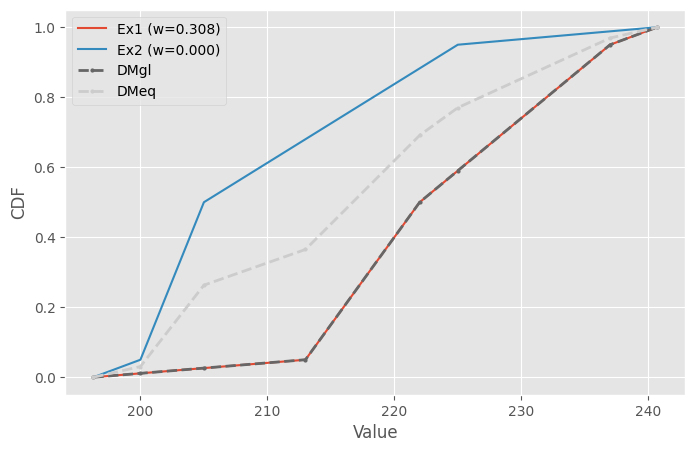

In [10]:
#select the question for which we want to plot the different CDFs
item = 'QUESTION4'
itemnr = project.items.ids.index(item)

# Get experts assessments for the item
itemassessment = project.assessments.get_array(experts='actual')[:, :, itemnr]
# Get bounds for the item
bounds = project.assessments.get_bounds(overshoot=0.1)
lower, upper = bounds[0][itemnr], bounds[1][itemnr]

# Plot experts' cdfs
fig, ax = plt.subplots(figsize=(8, 5))

for i, assessment in enumerate(itemassessment):
    ax.plot(np.r_[lower, assessment, upper], np.r_[0.0, project.assessments.quantiles, 1.0],
            label='{} (w={:.3f})'.format(project.experts.ids[i], project.experts.comb_score[i] / sum(project.experts.comb_score)))
    
# Plot DM's cdf
ax.plot(*project.assessments.full_cdf['DMgl'][itemnr].T, label='DMgl', marker='.', ms=4, color='0.4', ls='--', lw=2)
ax.plot(*project.assessments.full_cdf['DMeq'][itemnr].T, label='DMeq', marker='.', ms=4, color='0.8', ls='--', lw=2)

ax.legend()

ax.set_title(project.items.questions[itemnr])
ax.set_xlabel('Value')
ax.set_ylabel('CDF');

### 7. Robustness

A way of checking the robustness of the project is by removing one or multiple items or experts from the project in turn, and checking the resulting information and calibration scores. If these values will change a lot, it shows that the number of items or experts might be a bit too low.

In [11]:
# Exclude up to four items
project.calculate_item_robustness(
    weight_type='global',
    overshoot=0.1,
    max_exclude=4,
    min_exclude=0,
    calpower=1.0,
    alpha=0.0
)

In the next table, you can see the score changes when different questions are extracted of the calculations. As this is an artifitial example, the Calibration Score has a extrange behaviour, where there is no change of the score or only one single change when one or multiple questions are removed. You are now encouraged to take some of the examples on the github repository that you will find at the end of this notebook and try some of the different examples you can find there.

In [12]:
robres = project.main_results.item_robustness
index = [val[:] if val else 'None' for val in list(robres.keys())]
pd.DataFrame(data=robres.values(), index=index, columns=['Info score total' ,'Info score realizations', 'Calibration score'])

,Info score total,Info score realizations,Calibration score
None,0.518671,0.647193,0.009838
"(QUESTION1,)",0.538335,0.684306,0.044087
"(QUESTION2,)",0.504969,0.638108,0.044087
"(QUESTION3,)",0.536559,0.681847,0.044087
"(QUESTION4,)",0.512565,0.648628,0.007438
...,...,...,...
"(QUESTION10, QUESTION11, QUESTION12, QUESTION13)",0.192171,0.198116,0.013974
"(QUESTION10, QUESTION11, QUESTION12, QUESTION14)",0.427113,0.561269,0.013974
"(QUESTION10, QUESTION11, QUESTION13, QUESTION14)",0.461528,0.612890,0.013974
"(QUESTION10, QUESTION12, QUESTION13, QUESTION14)",0.372956,0.479891,0.000799


When more questions are extracted, the variation of the Information Score grows. This means that the calculations results are more sensitive when more questions are extracted.

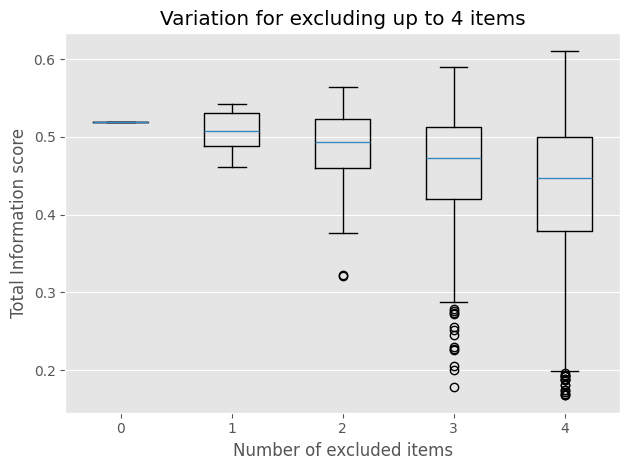

In [13]:
# Collect the results per number of excluded items
robres = project.main_results.item_robustness
values = {}
for key, value in robres.items():
    # Add dictionary item if it does not exist yet
    if len(key) not in values.keys():
        values[len(key)] = []
    # Append total information score (the 1st value)
    values[len(key)].append(value[0])
        
# Show the variation in calibration and information scores.
fig, ax = plt.subplots()
ax.boxplot(values.values(), positions=list(values.keys()));
ax.set_xlabel('Number of excluded items')
ax.set_ylabel('Total Information score')
ax.set_title('Variation for excluding up to 4 items');
ax.grid(axis='x')
fig.tight_layout()
plt.show()

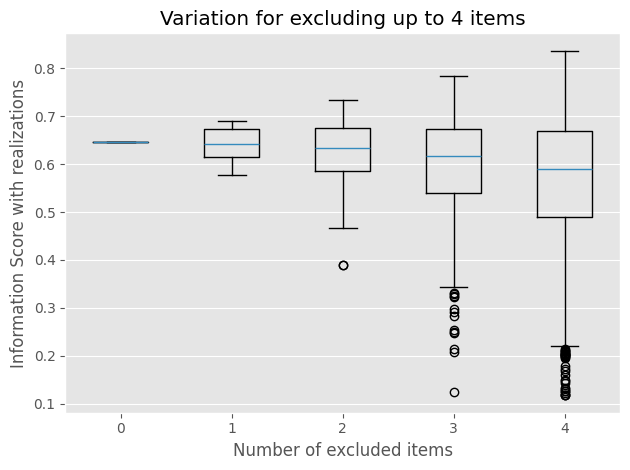

In [14]:
# Collect the results per number of excluded items
robres = project.main_results.item_robustness
values = {}
for key, value in robres.items():
    # Add dictionary item if it does not exist yet
    if len(key) not in values.keys():
        values[len(key)] = []
    # Append information score with realizations
    values[len(key)].append(value[1])
        
# Show the variation in calibration and information scores.
fig, ax = plt.subplots()
ax.boxplot(values.values(), positions=list(values.keys()));
ax.set_xlabel('Number of excluded items')
ax.set_ylabel('Information Score with realizations')
ax.set_title('Variation for excluding up to 4 items');
ax.grid(axis='x')
fig.tight_layout()

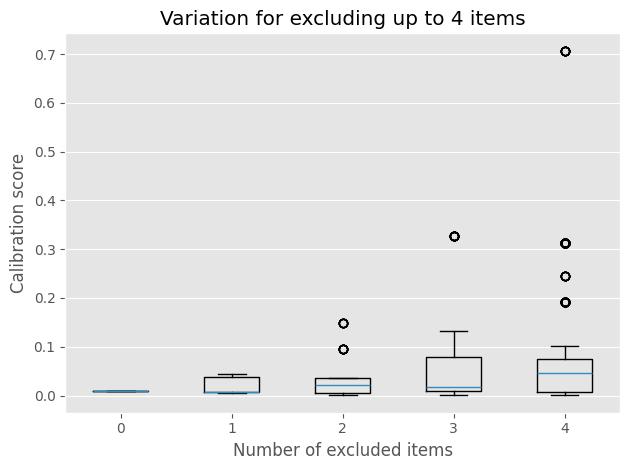

In [15]:
# Collect the results per number of excluded items
robres = project.main_results.item_robustness
values = {}
for key, value in robres.items():
    # Add dictionary item if it does not exist yet
    if len(key) not in values.keys():
        values[len(key)] = []
    # Append calibration score (the 3th value, index 2 since Python is zero-based)
    values[len(key)].append(value[2])
        
# Show the variation in calibration and information scores.
fig, ax = plt.subplots()
ax.boxplot(values.values(), positions=list(values.keys()));
ax.set_xlabel('Number of excluded items')
ax.set_ylabel('Calibration score')
ax.set_title('Variation for excluding up to 4 items');
ax.grid(axis='x')
fig.tight_layout()